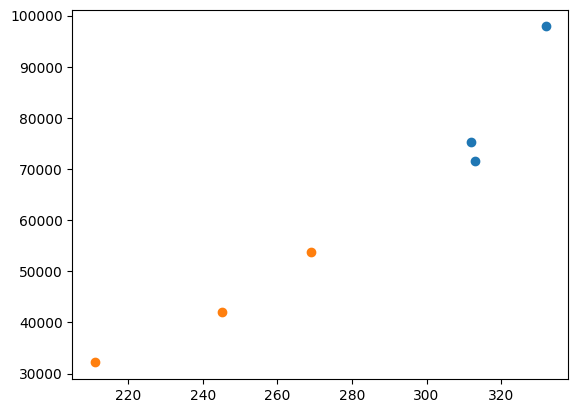

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../datasets/dataset_ships.csv")

X = df.iloc[:, 0:-1].values
y = df.iloc[:, 2].values

plt.figure()
plt.scatter(X[y==0][:, 0], X[y==0][:, 1])
plt.scatter(X[y==1][:, 0], X[y==1][:, 1])
plt.show()

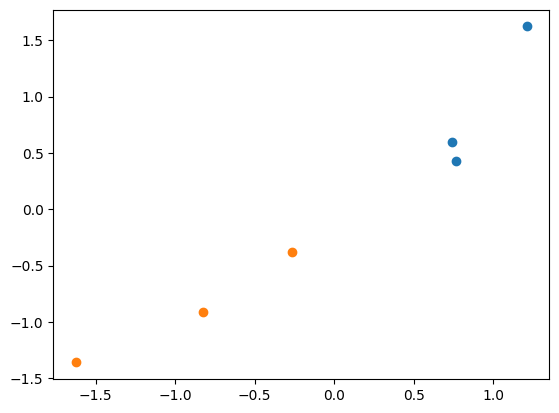

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.figure()
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1])
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1])
plt.show()

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X_scaled)

pca.explained_variance_ratio_

array([0.98352646])

In [34]:
X_scaled

array([[ 0.76560164,  0.42502325],
       [-0.26561689, -0.38030547],
       [-0.82809973, -0.90838094],
       [ 1.21090055,  1.62350207],
       [ 0.74216485,  0.60118465],
       [-1.62495041, -1.36102355]])

In [35]:
X_scaled_compressed = pca.transform(X_scaled)
X_scaled_compressed

array([[-0.84189893],
       [ 0.45673608],
       [ 1.22787726],
       [-2.00422531],
       [-0.94989154],
       [ 2.11140244]])

In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_scaled_compressed,y)

In [40]:
x_new = [260,40000]
x_new_scaled = scaler.transform([x_new])
x_new_scaled

array([[-2.82022643, -1.9131231 ]])

In [41]:
x_new_scaled_compressed = pca.transform(x_new_scaled)
x_new_scaled_compressed

array([[3.34698355]])

In [42]:
clf.predict(x_new_scaled_compressed)

array([1])